<a href="https://colab.research.google.com/github/Kealfeyne/Samsung_Bootcamp_Classic_ML/blob/main/final_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt 

In [3]:
dataset = pd.read_csv('dataset.txt', sep=' ', header=None, skipinitialspace=True)
dataset.drop([0, 1, 2, 3, 504], axis=1, inplace=True)
dataset.columns = list(range(500))

In [4]:
dataset = 2**14-dataset-1560

In [537]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,4,1,0,2,6,4,0,2,4,4,...,-4,2,9,9,7,5,4,2,4,5
1,4,2,4,-2,0,2,4,2,1,3,...,-4,7,0,2,0,5,4,5,2,4
2,4,4,2,-1,4,0,0,5,1,0,...,4,3,4,4,6,3,1,4,4,3
3,-4,2,6,0,0,2,4,2,0,4,...,0,-2,2,3,4,-4,4,2,1,2
4,1,9,1,3,-3,4,1,0,8,3,...,4,4,1,-4,0,4,0,0,2,-1


In [538]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23479 entries, 0 to 23478
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 89.6 MB


In [ ]:
dataset.T.describe()

In [ ]:
array = range(1000, 1100)
ax = dataset.T[:][140:200].plot(title='Signal', legend=None, figsize=(20,10))
plt.show()

In [541]:
# x = 147 - начало сигнала
# y = 12 - конец сигнала
# y = 14824 - точка плато

Создадим DataFrame с новыми фичами

In [50]:
features = ['max', 'peak', 'start', 'finish', 'duration', 'increasing_duration',\
            'decreasing_duration']
new_dataset = pd.DataFrame([], index=dataset.index, columns=features)

Будем строить фичи такими способами:
* Началом сигнала будем считать момент резкого изменения значения
* Концом сигнала будем считать преодоление порогового значения

In [153]:
new_dataset['max'] = dataset.max(axis=1)
new_dataset['peak'] = dataset.idxmax(axis=1)
new_dataset['start'] = dataset[dataset.loc[:, 130:170]\
                       .diff(periods=1, axis='columns') > 80].idxmin(axis=1)
new_dataset['start'].fillna(new_dataset['peak'], inplace=True)
new_dataset['finish'] = dataset[dataset < 70].fillna(0).astype(bool)\
                        .loc[:, 150:499].idxmax(axis=1)
new_dataset['duration'] = new_dataset['finish'] - new_dataset['start']
new_dataset['increasing_duration'] = new_dataset['peak'] - new_dataset['start']
new_dataset['decreasing_duration'] = new_dataset['finish'] - new_dataset['peak']

In [154]:
# new_dataset = new_dataset[['max', 'increasing_duration', 'decreasing_duration']]

In [155]:
new_dataset.isna().sum()

max                    0
peak                   0
start                  0
finish                 0
duration               0
increasing_duration    0
decreasing_duration    0
dtype: int64

In [156]:
new_dataset.describe()

,max,peak,start,finish,duration,increasing_duration,decreasing_duration
count,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000
mean,1836.138209,149.628604,147.198986,163.148132,15.949146,2.429618,13.519528
std,2389.308983,2.489996,0.590420,10.124480,10.001996,2.445482,9.369789
min,105.000000,145.000000,145.000000,150.000000,2.000000,0.000000,-316.000000
25%,309.000000,149.000000,147.000000,155.000000,8.000000,2.000000,7.000000
50%,814.000000,150.000000,147.000000,161.000000,14.000000,3.000000,11.000000
75%,2316.000000,151.000000,148.000000,169.000000,21.000000,3.000000,18.000000
max,14824.000000,472.000000,150.000000,218.000000,71.000000,325.000000,67.000000


Фильтрация сигналов, максимальное значение которых превышает регистрируемое

In [55]:
plato_filtering = dataset[dataset.max(axis=1) == 14824]
# ax = plato_filtering.T.plot(title='Signal', legend=None, figsize=(20,10))
# plt.show()

Фильтрация сигналов с двумя всплесками

In [56]:
improper_filtering = dataset[dataset.loc[:, 250:500].max(axis=1) > 100]
# ax = improper_filtering.T.plot(title='Signal', legend=None, figsize=(20,10))
# plt.show()

Удалим сигналы, которые не можем идентифицировать

In [57]:
undetectable = plato_filtering.index.tolist() + improper_filtering.index.tolist()
undetectable

[798, 6401, 9190, 9553, 11289, 13595, 17790, 22310, 23118, 1929, 6288]

In [157]:
processed_dataset = new_dataset.drop(undetectable)

In [158]:
processed_dataset.describe()

,max,peak,start,finish,duration,increasing_duration,decreasing_duration
count,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000
mean,1830.964931,149.614070,147.198909,163.137379,15.938469,2.415161,13.523308
std,2376.006251,1.331423,0.590456,10.111968,9.989437,1.244070,9.107569
min,105.000000,145.000000,145.000000,150.000000,2.000000,0.000000,2.000000
25%,309.000000,149.000000,147.000000,155.000000,8.000000,2.000000,7.000000
50%,813.000000,150.000000,147.000000,161.000000,14.000000,3.000000,11.000000
75%,2314.000000,151.000000,148.000000,169.000000,21.000000,3.000000,18.000000
max,14772.000000,152.000000,150.000000,218.000000,71.000000,5.000000,67.000000


#Рассмотрим подходы

In [176]:
current_dataset = processed_dataset

## Попробуем нормализовать фичи

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
def normalize_dataset(dataset):
  normalized_dataset = pd.DataFrame(MinMaxScaler(feature_range=(0, 1)).fit_transform(processed_dataset), columns=processed_dataset.columns)
  return normalized_dataset

In [33]:
normalized_dataset = normalize_dataset(processed_dataset)

In [15]:
from sklearn.metrics import silhouette_score

## AgglomerativeClustering

In [96]:
from sklearn.cluster import AgglomerativeClustering

In [97]:
model_agglomerative = AgglomerativeClustering(n_clusters=2)
# predictions = model_agglomerative.fit_predict(current_dataset)

In [134]:
score = silhouette_score(current_dataset, predictions)
score

0.0029636038457964585

##K-Means

In [17]:
from sklearn.cluster import KMeans

In [100]:
model_kmeans = KMeans(n_clusters=2, max_iter=5000, random_state=42)
# predictions = model_kmeans.fit_predict(current_dataset)

In [101]:
score = silhouette_score(current_dataset, predictions)
score

0.6356343698130337

## Попробуем "ручками"

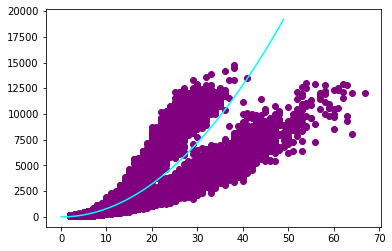

In [174]:
fig, ax = plt.subplots()

ax.scatter(processed_dataset['decreasing_duration'],\
           processed_dataset['max'], c = 'purple', )
x = range(0, 50)
y = [i*i*8 for i in x]
ax.plot(x, y, c = 'cyan')
plt.show()

In [168]:
xs = current_dataset['decreasing_duration']
ys = current_dataset['max']
predictions = (xs*xs*8 > ys).astype(int)

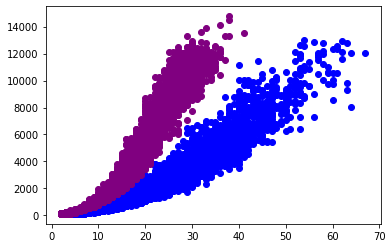

In [169]:
plt.scatter(current_dataset[predictions == 1]['decreasing_duration'], current_dataset[predictions == 1]['max'], c='blue')
plt.scatter(current_dataset[predictions == 0]['decreasing_duration'], current_dataset[predictions == 0]['max'], c='purple')
plt.show()

Заметим интересный score - на Kaggle 0.77 :)

In [ ]:
score = silhouette_score(current_dataset, predictions)

## Попробуем ручками 2.0

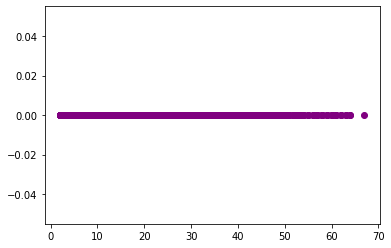

In [170]:
fig, ax = plt.subplots()

ax.scatter(processed_dataset['decreasing_duration'], [0]*processed_dataset['decreasing_duration'].shape[0], c = 'purple', )
plt.show()

# Подготовка результата

In [171]:
result = get_result(predictions)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
def get_result(predictions):
  result = pd.DataFrame(predictions, index=current_dataset.index, columns=['cluster'])
  result = result.append(pd.DataFrame([2]*len(undetectable), index=undetectable, columns=['cluster']))
  result.sort_index(inplace=True)
  result['index'] = result.index
  result.sort_index(axis=1, inplace=True, ascending=False)

  predictions_values = result['cluster'].unique()
  dictionary = {predictions_values[i]: i for i in range(len(predictions_values))}
  result['cluster'] = result['cluster'].map(dictionary)

  result.to_csv('result.csv', index=False)
  files.download('result.csv')
  return result